# Quantitative Risk Managment

In [1]:
from pandas_datareader import data as pdr
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
plt.style.use('ggplot')

In [2]:
indices = {'AAPL': 'Apple', 'TSLA': 'Tesla', 'AMZN': 'Amazon', 'JPM': 'JP Morgan Chase & Co.',
           'GOOG': 'Google', 'QCOM': 'QUALCOMM Incorporated',
           'NVDA': 'NVIDIA Corporation', 'ADBE': 'Adobe Inc.', 'EBAY': 'eBay Inc.',
           'GS': 'The Goldman Sachs Group, Inc.', 'BAC': 'Bank of America Corporation',
           'WFC': 'Wells Fargo & Company', 'PFE': 'Pfizer Inc.', 'GE': 'General Electric Company',
           'AMD': 'Advanced Micro Devices, Inc.', 'AMC': 'AMC Entertainment Holdings, Inc.',
           'F': 'Ford Motor Company', 'T': 'AT&T Inc.', 'MS': 'Morgan Stanley',
           'C': 'Citigroup Inc.', 'CSCO': 'Cisco Systems, Inc.'}

start_date = '2012-01-01'
end_date= '2021-01-01'
data = {}

for k in indices:
    data[k] = pdr.DataReader(k, start=start_date, end=end_date, data_source='yahoo')['Adj Close']

In [3]:
adj_close = pd.DataFrame(data)
adj_close.head()

,AAPL,TSLA,AMZN,JPM,GOOG,QCOM,NVDA,ADBE,EBAY,GS,...,WFC,PFE,GE,AMD,AMC,F,T,MS,C,CSCO
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,12.650659,5.616,179.029999,26.863564,331.462585,42.361191,12.908555,28.570000,12.769343,82.454552,...,21.491854,14.885120,13.900859,5.48,NaN,7.544740,17.903456,13.490028,24.939150,14.035937
2012-01-04,12.718646,5.542,177.509995,27.033739,332.892242,42.790398,13.055660,28.280001,12.288556,81.918457,...,21.590134,14.749610,14.052279,5.46,NaN,7.659981,17.932917,13.372575,24.798304,14.307162
2012-01-05,12.859850,5.424,177.610001,27.598391,328.274536,42.966679,13.524563,28.480000,12.512652,81.780121,...,21.937874,14.634439,14.044711,5.46,NaN,7.856563,17.915241,13.657812,25.097607,14.254426
2012-01-06,12.994284,5.382,182.610001,27.350857,323.796326,43.043320,13.368260,28.719999,12.480057,80.777100,...,21.877396,14.614108,14.120420,5.43,NaN,7.937905,17.747814,13.339020,25.132816,14.201690
2012-01-09,12.973674,5.450,178.559998,27.304457,310.067780,42.851719,13.368260,28.530001,12.431163,81.875229,...,22.149542,14.783491,14.279417,5.59,NaN,7.998916,17.735847,13.590699,25.599384,14.292099


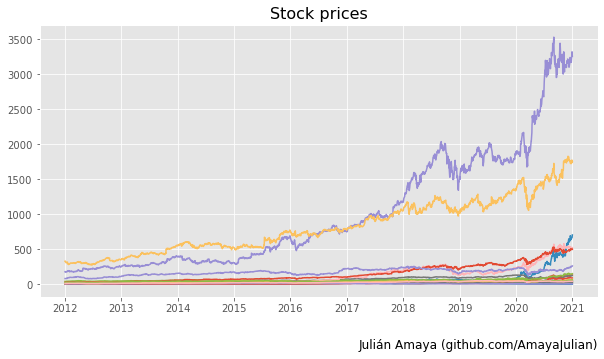

In [4]:
plt.figure(figsize = (10, 5))
for k, v in indices.items():
    plt.plot(adj_close.index, adj_close[k].values, label=v)
plt.title('Stock prices', size=16)
plt.figtext(0.9, -0.02, "Julián Amaya (github.com/AmayaJulian)", ha="right", fontsize=12)
plt.show()

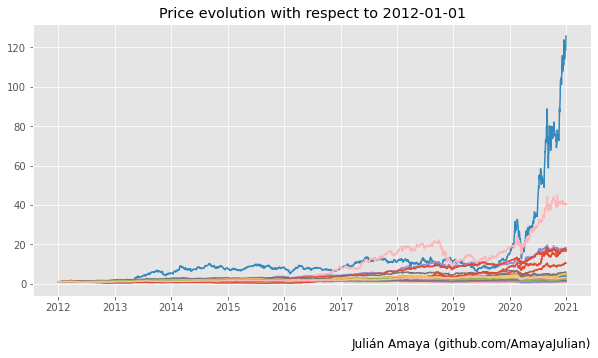

In [5]:
plt.figure(figsize = (10, 5))
for k, v in indices.items():
    plt.plot(adj_close.index, adj_close[k].values / adj_close[k].values[0], label=v)
plt.title('Price evolution with respect to {}'.format(start_date))
plt.figtext(0.9, -0.02, "Julián Amaya (github.com/AmayaJulian)", ha="right", fontsize=12)
plt.show()

## Daily Returns

In [6]:
returns = adj_close.pct_change().dropna()
returns.head()

,AAPL,TSLA,AMZN,JPM,GOOG,QCOM,NVDA,ADBE,EBAY,GS,...,WFC,PFE,GE,AMD,AMC,F,T,MS,C,CSCO
Date,,,,,,,,,,,,,,,,,,,,,
2013-12-19,-0.011457,-0.049061,-0.001945,-0.000175,0.001355,-0.010249,0.003916,-0.015413,0.005082,-0.000401,...,0.002003,-0.001950,0.004781,0.000000,0.031217,-0.022364,0.002036,-0.024035,-0.001540,0.003333
2013-12-20,0.008375,0.017908,0.017738,0.008212,0.013257,0.006627,0.020156,0.019439,0.022098,0.002232,...,-0.001333,-0.014979,0.001464,0.010959,0.009748,0.007843,-0.004355,0.002268,0.006361,0.002848
2013-12-23,0.038378,0.002164,0.001790,0.009359,0.013156,-0.000961,0.005736,0.003544,0.013192,0.007479,...,0.005561,0.003306,0.001462,0.016260,0.003049,-0.017510,0.011371,0.005820,0.003831,0.020823
2013-12-24,-0.004245,0.054754,-0.009233,0.000172,-0.002923,0.002746,0.002535,0.001009,-0.002351,-0.001756,...,0.003982,-0.001977,0.007664,0.005333,-0.010638,0.002640,0.007495,-0.003215,0.000382,0.005564
2013-12-26,-0.006641,0.027013,0.013001,-0.000858,0.005055,0.006025,-0.009482,0.000840,-0.020120,0.001646,...,0.003305,0.008584,0.007968,0.007958,0.012801,0.009217,0.006009,0.002903,-0.001526,0.005071


## Correlation between stocks

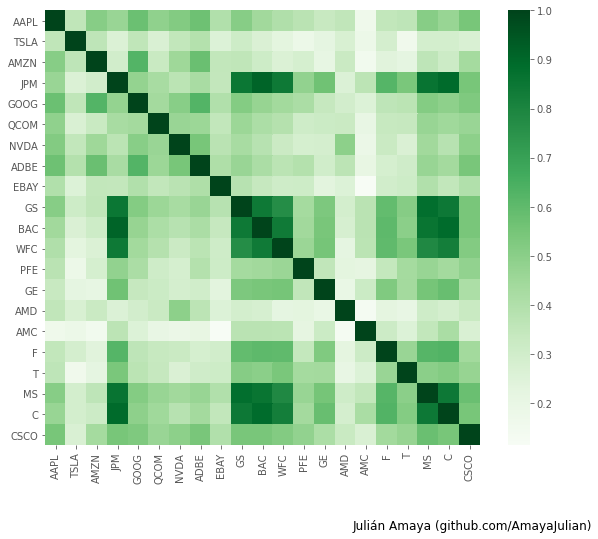

In [7]:
plt.figure(figsize = (10, 8))
sns.heatmap(returns.corr(), square=True, cmap='Greens')
plt.figtext(0.9, -0.02, "Julián Amaya (github.com/AmayaJulian)", ha="right", fontsize=12)
plt.show()

## Moments of the distribution of returns

In [8]:
from scipy.stats import skew
from scipy.stats import kurtosis

# Mean
mean = np.mean(returns)
# Variance
var = np.std(returns)**2
# Skewness
skw = skew(returns)
skw = pd.Series(skw, index=mean.index)
# Kurtosis
kur = kurtosis(returns)
kur = pd.Series(kur, index=mean.index)

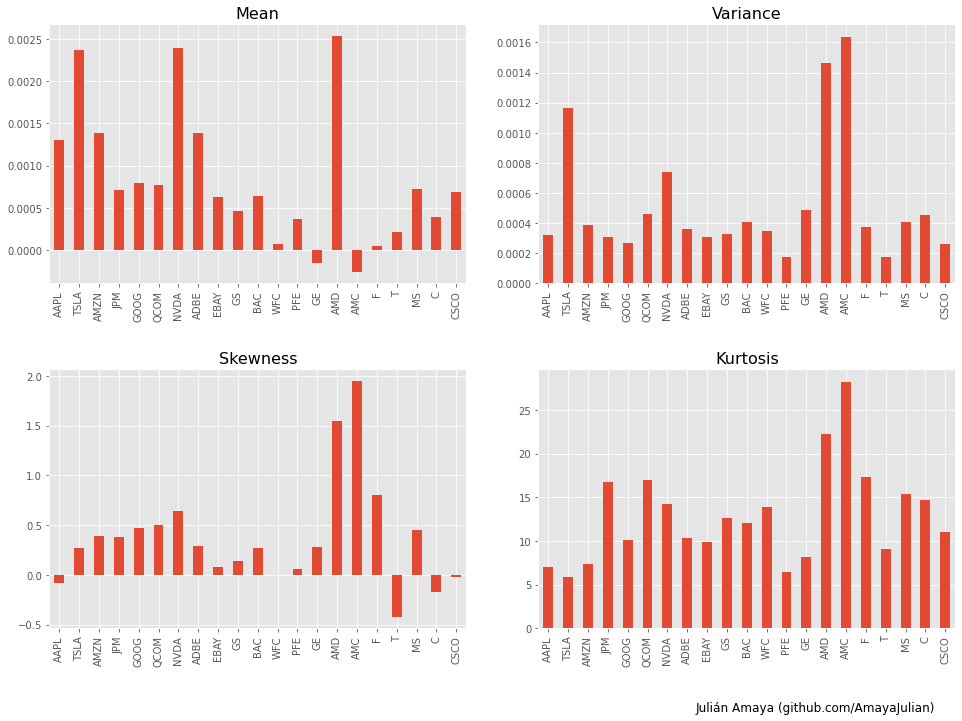

In [9]:
figure, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (14, 10))

ax = plt.subplot(2, 2, 1)
mean.plot(kind='bar')
plt.title('Mean', size=16)

ax = plt.subplot(2, 2, 2)
var.plot(kind='bar')
plt.title('Variance', size=16)

ax = plt.subplot(2, 2, 3)
skw.plot(kind='bar')
plt.title('Skewness', size=16)

ax = plt.subplot(2, 2, 4)
kur.plot(kind='bar')
plt.title('Kurtosis', size=16)

figure.tight_layout(pad=3.0)
plt.figtext(0.95, -0.02, "Julián Amaya (github.com/AmayaJulian)", ha="right", fontsize=12)
plt.show()

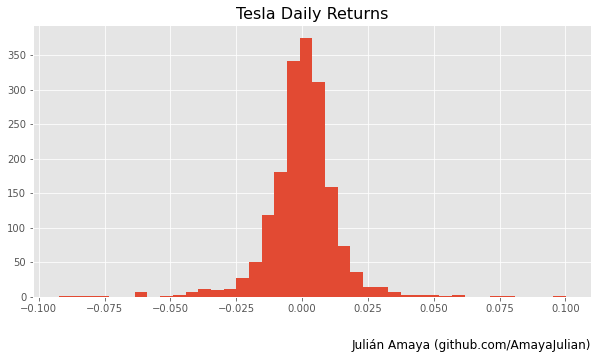

In [10]:
plt.figure(figsize = (10,5))
returns['T'].hist(bins=40, density=False)
plt.title('Tesla Daily Returns', size=16)
plt.figtext(0.9, -0.02, "Julián Amaya (github.com/AmayaJulian)", ha="right", fontsize=12)
plt.show()

## Shapiro-Wilk normality test

The function will return two values in a list. The first value is the t-stat of the test, and the second value is the p-value. If the p-value is less than or equal to 0.05, we reject the null hypothesis of normality, whereas if the p-value is greater than 0.05 the null hypothesis of normality can't be rejected.

In [11]:
# Shapiro-Wilk normality test
from scipy import stats

p_values = []
for k in indices:
    p_values.append(stats.shapiro(returns[k])[1])
p_values = pd.Series(p_values, index=mean.index)

print(p_values)

AAPL    2.883138e-30
TSLA    7.504470e-30
AMZN    9.621566e-31
JPM     2.027586e-37
GOOG    1.156257e-31
QCOM    5.051565e-39
NVDA    3.603697e-34
ADBE    7.363676e-33
EBAY    1.698585e-32
GS      7.813199e-34
BAC     9.691417e-34
WFC     2.300448e-38
PFE     1.403450e-29
GE      8.135636e-35
AMD     1.730869e-34
AMC     3.503246e-44
F       1.100597e-35
T       1.685963e-33
MS      3.036234e-34
C       8.569721e-38
CSCO    5.079375e-35
dtype: float64


# Equally weighted portfolio

In [12]:
# Number of stocks in our portfolio
numstocks = len(indices)

# Portfolio weights
ew_weights = np.repeat(1 / numstocks, numstocks)

# Portfolio returns
port_returns = returns.mul(ew_weights, axis=1).sum(axis=1)

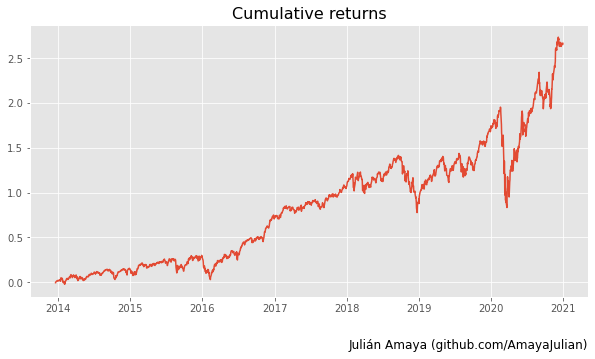

In [13]:
plt.figure(figsize = (10,5))
plt.plot(np.cumprod(1 + port_returns) - 1)
plt.title('Cumulative returns', size=16)
plt.figtext(0.9, -0.02, "Julián Amaya (github.com/AmayaJulian)", ha="right", fontsize=12)
plt.show()

In [14]:
# Daily covariance matrix
cov_mat = returns.cov()

# Daily volatility
port_vol = np.sqrt(np.dot(ew_weights.T, np.dot(cov_mat, ew_weights)))
print('Portfolio daily volatility: {:.3f}'.format(port_vol))

Portfolio daily volatility: 0.014


In [15]:
# Risk free rate
risk_free = 0

# Portfolio cummulative return
cummulative_returns = np.cumprod(1 + port_returns) - 1
port_return = cummulative_returns[-1]

# Number of trading days
n_days = adj_close.shape[0]

# Sharpe Ratio
sharpe = (port_return - risk_free) / (port_vol * np.sqrt(n_days))

print('The Sharpe ratio for this portfolio is: {:.3f}'.format(sharpe))

The Sharpe ratio for this portfolio is: 4.001


## Market capitalization weighted portfolio

In [16]:
# Market capitalizations
market_capitalizations = pdr.get_quote_yahoo(indices)['marketCap']

# Portfolio weights
mcap_weights = market_capitalizations / sum(market_capitalizations)

# Portfolio returns
port_returns = returns.mul(mcap_weights, axis=1).sum(axis=1)

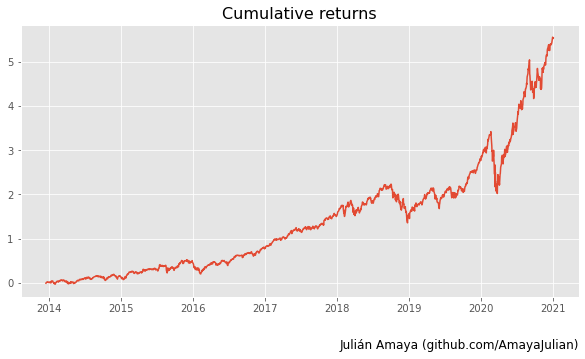

In [17]:
plt.figure(figsize = (10, 5))
plt.plot(np.cumprod(1 + port_returns) - 1)
plt.title('Cumulative returns', size=16)
plt.figtext(0.9, -0.02, "Julián Amaya (github.com/AmayaJulian)", ha="right", fontsize=12)
plt.show()

In [18]:
# Daily covariance matrix
cov_mat = returns.cov()

# Daily volatility
port_vol = np.sqrt(np.dot(mcap_weights.T, np.dot(cov_mat, mcap_weights)))
print('Portfolio daily volatility: {:.3f}'.format(port_vol))

Portfolio daily volatility: 0.014


In [19]:
# Risk free rate
risk_free = 0

# Portfolio cummulative return
cummulative_returns = np.cumprod(1 + port_returns) - 1
port_return = cummulative_returns[-1]

# Number of trading days
n_days = adj_close.shape[0]

# Sharpe Ratio
sharpe = (port_return - risk_free) / (port_vol * np.sqrt(n_days))

print('The Sharpe ratio for this portfolio is: {:.3f}'.format(sharpe))

The Sharpe ratio for this portfolio is: 8.200


# Efficient frontier of portfolios

In [20]:
# Create lists to store the simuation results
sim_weights = []
sim_returns = []
sim_volatility = []
sim_sharpe = []
# Number of portfolio simuations
N_sim = 100000

# Number of stocks in our portfolio
num_stocks = len(indices)
# Number of trading days
n_days = adj_close.shape[0]
# Daily covariance matrix
cov_mat = returns.cov()
# Risk free rate
risk_free = 0

for _ in range(N_sim):
    # Generate random weights
    temp = np.random.rand(num_stocks)
    w = temp / np.sum(temp)
    sim_weights.append(w)
    
    # Returns
    port_returns = returns.mul(w, axis=1).sum(axis=1)
    cummulative_returns = np.cumprod(1 + port_returns) - 1
    port_return = cummulative_returns[-1]
    sim_returns.append(port_return)
    
    # Daily volatility
    port_vol = np.sqrt(np.dot(w.T, np.dot(cov_mat, w)))
    sim_volatility.append(port_vol * np.sqrt(n_days))
    
    # Sharpe Ratio
    s = (port_return - risk_free) / (port_vol * np.sqrt(n_days))
    sim_sharpe.append(s)

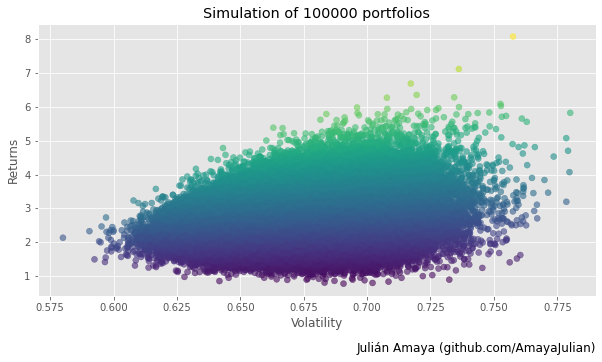

In [21]:
plt.figure(figsize = (10, 5))
plt.scatter(sim_volatility, sim_returns, alpha=0.6, c=sim_sharpe)
plt.xlabel('Volatility', size=12)
plt.ylabel('Returns', size=12)
plt.title('Simulation of {} portfolios'.format(N_sim))
plt.figtext(0.9, -0.03, "Julián Amaya (github.com/AmayaJulian)", ha="right", fontsize=12)
plt.show()

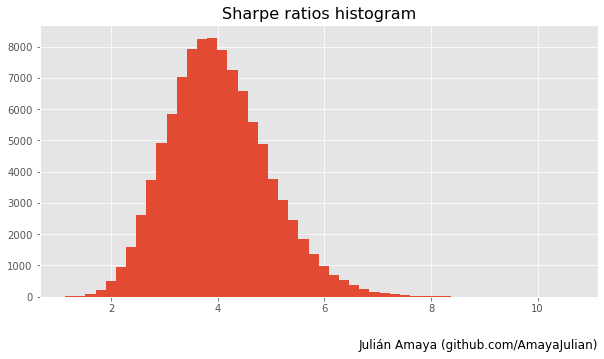

In [22]:
plt.figure(figsize = (10, 5))
plt.hist(sim_sharpe, bins=50)
plt.title('Sharpe ratios histogram', size=16)
plt.figtext(0.9, -0.02, "Julián Amaya (github.com/AmayaJulian)", ha="right", fontsize=12)
plt.show()

## References

- Jean-Philippe Bouchaud, Marc Potters. _Theory of Financial Risk and Derivative Pricing: from Statistical Physics to Risk Management._ Cambridge Univ. Press, 2011.
- DataCamp Online Course: Introduction to Portfolio Risk Management in Python.
- DataCamp Online Course: Quantitative Risk Management in Python.